<a href="https://colab.research.google.com/github/Muzammil9822/Projects/blob/main/ASSIGNMENT_03_CSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download -d fusicfenta/chest-xray-for-covid19-detection

Dataset URL: https://www.kaggle.com/datasets/fusicfenta/chest-xray-for-covid19-detection
License(s): DbCL-1.0
 92% 162M/176M [00:01<00:00, 102MB/s] 
100% 176M/176M [00:02<00:00, 89.0MB/s]


In [6]:
! unzip chest-xray-for-covid19-detection.zip

Archive:  chest-xray-for-covid19-detection.zip
  inflating: Dataset/Prediction/NORMAL2-IM-0338-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0339-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0340-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0341-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0352-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0353-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0357-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0370-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0372-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg  
  inflating: Dataset/Prediction/NORMAL2-IM-0374-0001.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg  
  inflating: Dataset/Prediction/SARS-10.1148rg.242035193-g04mr3

In [7]:
import pandas as pd
import os
import shutil
import warnings
print(os.listdir("/content/Dataset"))

['Train', 'Val', 'Prediction']


In [8]:
TRAIN_PATH = "/content/Dataset/Train"
VAL_PATH = "/content/Dataset/Val"

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf

In [10]:
model = Sequential()
model.add(Conv2D(32 , kernel_size=(3,3) , activation ="relu" , input_shape=(240,240,3)))

model.add(Conv2D(64 , (3,3) , activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128 , (3,3) , activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64 , activation="relu"))
model.add(Dropout(.5))

model.add(Dense(1 , activation="sigmoid"))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy , optimizer="adam" , metrics=["accuracy" ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 118, 118, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 118, 118, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 116, 116, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 128)       0         
 g2D)                                                   

In [ ]:
train_datagen = image.ImageDataGenerator(
rescale = 1./255. ,
shear_range = 0.2 ,
zoom_range =0.2 ,
 horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/Dataset/Train',
    target_size = (240,240),
    batch_size =32 ,
    class_mode ="binary"
)

Found 288 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
val_generator = test_dataset.flow_from_directory(
    '/content/Dataset/Val',
    target_size = (240,240),
    batch_size =32 ,
    class_mode ="binary"
)

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
train_generator ,
steps_per_epoch = 8 ,
epochs = 10 ,
validation_data = val_generator,
validation_steps = 2
)

<ipython-input-22-813924432837>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 90s 11s/step - loss: 2.2082 - accuracy: 0.5195 - val_loss: 0.6902 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 90s 11s/step - loss: 0.6671 - accuracy: 0.6094 - val_loss: 0.5948 - val_accuracy: 0.9333
Epoch 3/10
8/8 [==============================] - 94s 12s/step - loss: 0.5103 - accuracy: 0.7539 - val_loss: 0.3694 - val_accuracy: 0.9333
Epoch 4/10
8/8 [==============================] - 92s 12s/step - loss: 0.4442 - accuracy: 0.8203 - val_loss: 0.3238 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 91s 11s/step - loss: 0.2892 - accuracy: 0.8789 - val_loss: 0.1658 - val_accuracy: 0.9500
Epoch 6/10
8/8 [==============================] - 91s 11s/step - loss: 0.1994 - accuracy: 0.9336 - val_loss: 0.0968 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 87s 11s/step - loss: 0.1777 - accuracy: 0.9414 - val_loss: 0.0842 - val_accuracy: 0.9500
Epoch 8/10
8/8 [===========

In [ ]:
hist

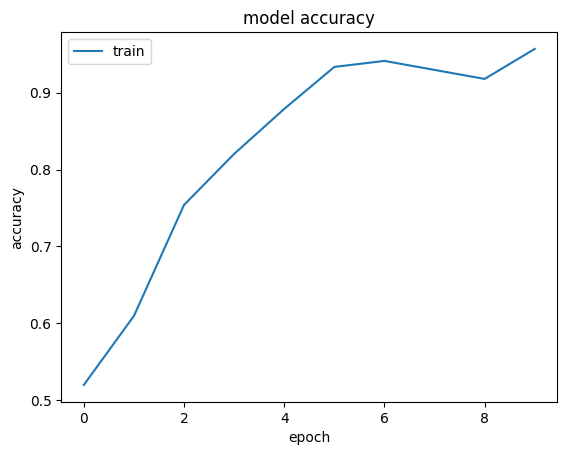

In [ ]:
plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()